In [1]:
exec(open('/glade/u/home/molina/python_scripts/deep-conus/deep-conus/10_create_study_visualizations.py').read())

Using TensorFlow backend.


In [ ]:
import xarray as xr

In [2]:
currentdata=StudyVisualizer(climate='current', method='random', variable1='WMAX', variable2='QVAPOR1',
                            dist_directory='/glade/scratch/molina/DL_proj/current_conus_fields/dl_preprocess/', 
                            model_directory='/glade/scratch/molina/DL_proj/current_conus_fields/dl_models/', 
                            model_num=12, 
                            comp_directory='/glade/scratch/molina/DL_proj/current_conus_fields/dl_models/', 
                            mask=False, 
                            random_choice=1)

futuredata=StudyVisualizer(climate='future', method='random', variable1='WMAX', variable2='QVAPOR1',
                            dist_directory='/glade/scratch/molina/DL_proj/future_conus_fields/dl_preprocess/', 
                            model_directory='/glade/scratch/molina/DL_proj/current_conus_fields/dl_models/', 
                            model_num=12, 
                            comp_directory='/glade/scratch/molina/DL_proj/future_conus_fields/dl_models/', 
                            mask=False, 
                            random_choice=1)

In [3]:
current_data=currentdata.extract_variable_and_dbz()
future_data=futuredata.extract_variable_and_dbz()

currentdata.extract_variable_mean_and_std()
futuredata.extract_variable_mean_and_std()

curr_data=currentdata.grab_value_of_storm(current_data, group_choice='tp')
futu_data=futuredata.grab_value_of_storm(future_data, group_choice='tp')

In [4]:
curr_wind, futu_wind = currentdata.compute_wind_shear(current_data, future_data, comp_str='tp')

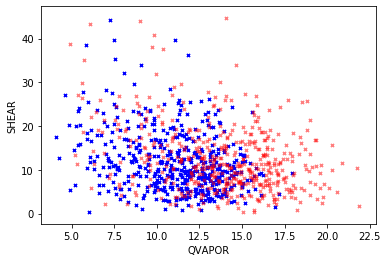

In [5]:
plot_current_and_future(((curr_data[1]*1000)[:500],curr_wind[:500]), ((futu_data[1]*1000)[:500],futu_wind[:500]), markersize=10, marker='x', 
                        facecolor='none', color=['b','r'], xlabel='QVAPOR', ylabel='SHEAR')

In [5]:
import seaborn as sns

In [15]:
df=pd.DataFrame(np.zeros((curr_wind[:500].values.shape[0], 4), dtype=float),
                columns=["QVAPOR_C","SHEAR_C","QVAPOR_F","SHEAR_F"])

df["QVAPOR_C"]=(curr_data[1]*1000)[:500]
df["SHEAR_C"]=curr_wind[:500].values
df["QVAPOR_F"]=(futu_data[1]*1000)[:500]
df["SHEAR_F"]=futu_wind[:500].values

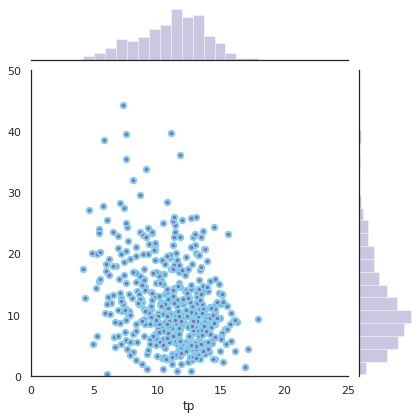

In [16]:
sns.jointplot(x=(curr_data[1]*1000)[:500], y=curr_wind[:500].values, kind='scatter', 
              s=30, color='m', edgecolor="skyblue", linewidth=2, xlim=(0, 25), ylim=(0, 50))
sns.set(style="white", color_codes=True)

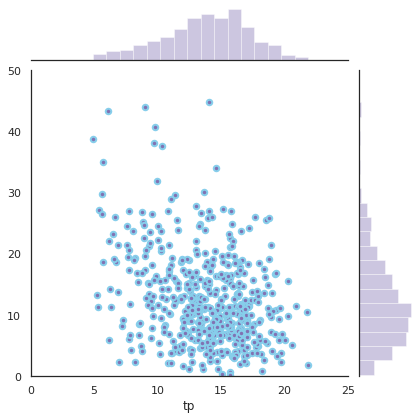

In [17]:
a_plot=sns.jointplot(x=(futu_data[1]*1000)[:500], y=futu_wind[:500].values, kind='scatter', 
                     s=30, color='m', edgecolor="skyblue", linewidth=2, xlim=(0, 25), ylim=(0, 50))
sns.set(style="white", color_codes=True)

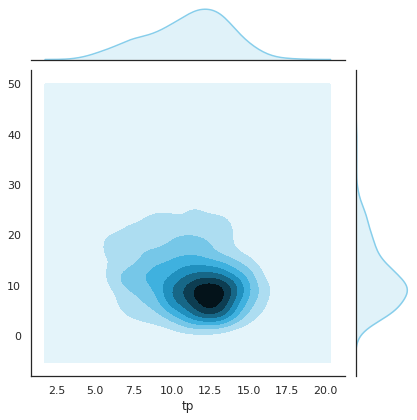

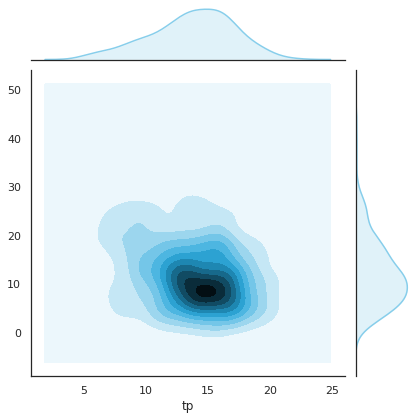

In [18]:
sns.jointplot(x=(curr_data[1]*1000)[:500], y=curr_wind[:500].values, kind='kde', color="skyblue")
sns.jointplot(x=(futu_data[1]*1000)[:500], y=futu_wind[:500].values, kind='kde', color="skyblue")

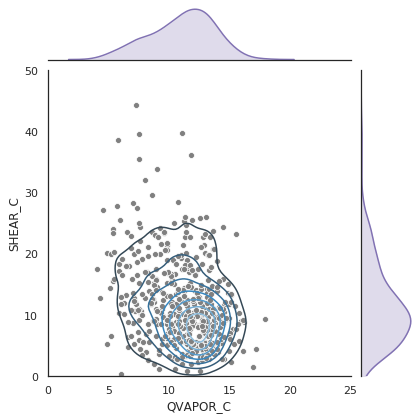

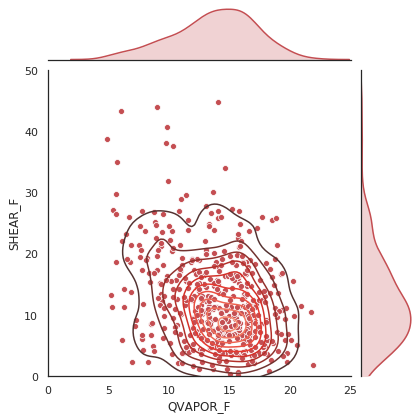

In [19]:
g = sns.JointGrid(x="QVAPOR_C", y="SHEAR_C", data=df,
                  xlim=(0, 25), ylim=(0, 50))
g = g.plot_joint(sns.kdeplot, cmap="Blues_d")
g = g.plot_joint(sns.scatterplot, color=".5")
g = g.plot_marginals(sns.kdeplot, color="m", shade=True)

g = sns.JointGrid(x="QVAPOR_F", y="SHEAR_F", data=df,
                  xlim=(0, 25), ylim=(0, 50))
g = g.plot_joint(sns.scatterplot, color="r")
g = g.plot_joint(sns.kdeplot, cmap="Reds_d")
g = g.plot_marginals(sns.kdeplot, color="r", shade=True)

In [20]:
dfc=pd.DataFrame(np.zeros((curr_wind[:500].values.shape[0], 2), dtype=float),
                columns=["QVAPOR_C","SHEAR_C"])
dfc["QVAPOR_C"]=(curr_data[1]*1000)[:500]
dfc["SHEAR_C"]=curr_wind[:500].values

dff=pd.DataFrame(np.zeros((futu_wind[:500].values.shape[0], 2), dtype=float),
                columns=["QVAPOR_F","SHEAR_F"])
dff["QVAPOR_F"]=(futu_data[1]*1000)[:500]
dff["SHEAR_F"]=futu_wind[:500].values

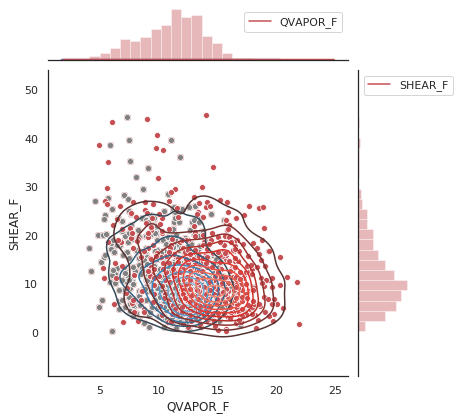

In [21]:
graph = sns.jointplot(x=dfc.QVAPOR_C, y=dfc.SHEAR_C, color='r')

graph = graph.plot_joint(sns.kdeplot, cmap="Blues_d")
graph = graph.plot_joint(sns.scatterplot, color=".5")
graph = graph.plot_marginals(sns.kdeplot, color="m", shade=True)

graph.x = dff.QVAPOR_F
graph.y = dff.SHEAR_F

graph = graph.plot_joint(sns.scatterplot, color="r")
graph = graph.plot_joint(sns.kdeplot, cmap="Reds_d")
graph = graph.plot_marginals(sns.kdeplot, color="r", shade=True)

(array([ 68., 141., 133.,  89.,  36.,  22.,   3.,   4.,   4.,   0.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 <a list of 10 Patch objects>)

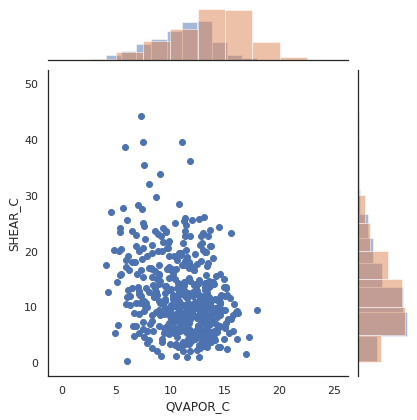

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.DataFrame(np.zeros((curr_wind[:500].values.shape[0], 4), dtype=float),
                columns=["QVAPOR_C","SHEAR_C","QVAPOR_F","SHEAR_F"])

df["QVAPOR_C"]=(curr_data[1]*1000)[:500]
df["SHEAR_C"]=curr_wind[:500].values
df["QVAPOR_F"]=(futu_data[1]*1000)[:500]
df["SHEAR_F"]=futu_wind[:500].values

p = sns.JointGrid(x = df["QVAPOR_C"],y = df["SHEAR_C"])

p = p.plot_joint(
    plt.scatter
    )

p.ax_marg_x.hist(
    df["QVAPOR_C"],
    alpha = 0.5
    )

p.ax_marg_y.hist(
    df["SHEAR_C"],
    orientation = 'horizontal',
    alpha = 0.5
    )

p.ax_marg_x.hist(
    df["QVAPOR_F"],
    alpha = 0.5,
    range = (0, 25)
    )

p.ax_marg_y.hist(
    df["SHEAR_F"],
    orientation = 'horizontal',
    alpha = 0.5,
    range = (0, 50),
    )

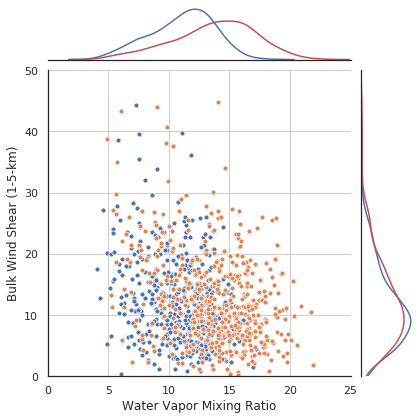

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df=pd.DataFrame(np.zeros((curr_wind[:500].values.shape[0], 4), dtype=float),
                columns=["QVAPOR_C","SHEAR_C","QVAPOR_F","SHEAR_F"])

df["QVAPOR_C"]=(curr_data[1]*1000)[:500]
df["SHEAR_C"]=curr_wind[:500].values
df["QVAPOR_F"]=(futu_data[1]*1000)[:500]
df["SHEAR_F"]=futu_wind[:500].values

g = sns.JointGrid(x = df["QVAPOR_C"],y = df["SHEAR_C"], data=df, xlim=(0, 25), ylim=(0, 50))

sns.scatterplot(df["QVAPOR_C"], df["SHEAR_C"], cmap="Blues", s=25, ax=g.ax_joint)
sns.scatterplot(df["QVAPOR_F"], df["SHEAR_F"], cmap="Reds", s=25, ax=g.ax_joint)

sns.distplot(df["QVAPOR_C"], hist=False, kde=True, color="b", ax=g.ax_marg_x)
sns.distplot(df["QVAPOR_F"], hist=False, kde=True, color="r", ax=g.ax_marg_x)

sns.distplot(df["SHEAR_C"], hist=False, kde=True, color="b", ax=g.ax_marg_y, vertical=True)
sns.distplot(df["SHEAR_F"], hist=False, kde=True, color="r", ax=g.ax_marg_y, vertical=True)

g.ax_joint.set_ylabel('Bulk Wind Shear (1-5-km)')
g.ax_joint.set_xlabel('Water Vapor Mixing Ratio')
g.ax_joint.grid('on')

g.ax_marg_y.set_ylabel('')
g.ax_marg_x.set_xlabel('')

plt.show()